## Today I'll be working on the cabin column.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
path = "../../../Data/titanic/"
train = pd.read_csv(path+"train.csv")
test = pd.read_csv(path+"test.csv")

In [4]:
train = train.set_index("PassengerId")
test = test.set_index("PassengerId")

In [5]:
train["Deck"] = train["Cabin"].apply(lambda x: x[0] if pd.notnull(x) else "M")
train.drop("Cabin", axis=1, inplace=True)

### Visualization of Deck in Train.

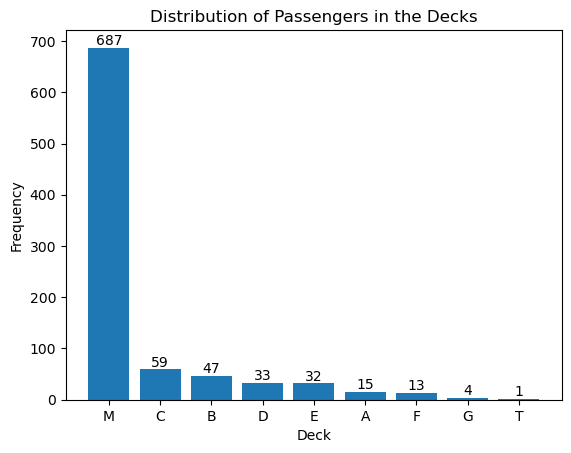

In [7]:
deck_count = train["Deck"].value_counts()
fig, ax = plt.subplots()
rect = ax.bar(deck_count.index, deck_count.values)
ax.bar_label(rect)
ax.set_title("Distribution of Passengers in the Decks")
ax.set_ylabel("Frequency")
ax.set_xlabel("Deck")
plt.show()

In [53]:
deck_ = []
deck_survived = []
deck_not_survived = []

for d in ["M", "C", "B", "D", "E", "A", "F", "G", "T"]:
    d_survived = train[train["Deck"] == d]["Survived"].sum()
    d_not_survived = train[(train["Deck"] == d) & (train["Survived"] == 0)]["Survived"].count()
    
    deck_.append(d)
    deck_survived.append(d_survived)
    deck_not_survived.append(d_not_survived)

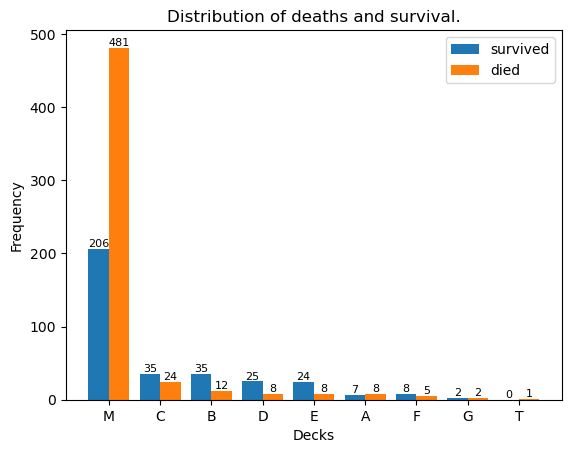

In [61]:
fig, ax = plt.subplots()
x = np.arange(len(deck_))
width = 0.4

rect = ax.bar(x, deck_survived, width=width, label="survived")
ax.bar_label(rect, fontsize=8)
x = x+width

rect = ax.bar(x, deck_not_survived, width=width, label="died")
ax.bar_label(rect, fontsize=8)
x = x-width/2

ax.set_title("Distribution of deaths and survival.")
ax.set_xlabel("Decks")
ax.set_ylabel("Frequency")
ax.set_xticks(x, deck_)
plt.legend()
plt.show()